reference : https://www.kaggle.com/code/heeraldedhia/text-classification-nlp/notebook

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# NLP
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from textblob import TextBlob
from textblob import Word
import re,string,unicodedata

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets
import warnings 
warnings.filterwarnings("ignore")




#Importing the basic librarires for building model - classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer 

from sklearn.preprocessing import LabelEncoder,StandardScaler

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hitomihoshino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hitomihoshino/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hitomihoshino/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/Users/hitomihoshino/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_csv("data/glassdoor_webscraped.csv")

In [3]:
df.head()
df = df.loc[:, "rating":"cons"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rating  9887 non-null   float64
 1   pros    9887 non-null   object 
 2   cons    9887 non-null   object 
dtypes: float64(1), object(2)
memory usage: 231.9+ KB


In [5]:
df.dropna(inplace = True)

In [6]:
df['pros'] = df['pros'].str.lower()
df['cons'] = df['cons'].str.lower()

In [7]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [8]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
df['pros']=df['pros'].apply(remove_stopwords)
df['cons']=df['cons'].apply(remove_stopwords)

{'myself', 'where', 'ma', 'other', 'we', 'an', 'me', 'doing', 'or', 'up', 's', 'didn', 'are', 'their', "you'll", 'no', 'same', 'about', "don't", "it's", 'yourself', 'don', 'below', 'because', 'so', 'mustn', 'yourselves', 'only', 'isn', 'have', 'hasn', "you'd", 'down', 'own', 'aren', 'why', 'having', 'my', 're', 'yours', 'here', 'from', 'few', "wasn't", 'theirs', 'into', 'further', 'in', 'wouldn', 'if', 'but', 'can', 'once', 'whom', 'doesn', 'until', 'when', 'than', 'during', "won't", 'at', 'you', 'they', 'out', 'while', 'just', "shouldn't", 'the', "you've", 'ours', 'these', 'o', 'on', "wouldn't", 'herself', 't', "shan't", 'what', 'after', 'under', 'he', 'such', "couldn't", 'as', 'for', 'haven', "haven't", 'both', 'weren', 'which', 'how', 'will', 'his', 'do', 'that', 'any', 'them', "didn't", 'of', 'to', "should've", 'll', 'this', 'she', 'has', 'd', "she's", 'more', "hasn't", 'ain', 'm', 'couldn', 'it', "that'll", 'above', 'wasn', "weren't", 'themselves', 'ourselves', 'off', 'your', 'y',

In [9]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',str(text))
    return text
#Apply function on review column
df['pros']=df['pros'].apply(remove_special_characters)
df['cons']=df['cons'].apply(remove_special_characters)

In [10]:
lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


#Apply function on review column
df['pros']=df['pros'].apply(lemmatize_text)
df['cons']=df['cons'].apply(lemmatize_text)

In [11]:
df['pros'] = [','.join(map(str, l)) for l in df['pros']]
df['cons'] = [','.join(map(str, l)) for l in df['cons']]

In [12]:
df.head()

,rating,pros,cons
0,5.0,"leader,support,transparency,benefit,worklife,b...","found,con,yet"
1,5.0,"quickly,move,access,networking,people,position...","large,company,decent,amount,red,tape"
2,5.0,"high,income,potential,upward,mobility","pressure,cooker,high,expectation,stress,expected"
3,5.0,"excellent,growth,networking,opportunity","many,con,think"
4,5.0,"given,freedom,flexibility,explore,multiple,rol...","still,startup,mentality,keep,mind,entail"


### Pros

In [13]:
docs = list(df['pros'])
tfidf_vectorizer = TfidfVectorizer(use_idf=True, max_features = 20000) 
tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(docs)
docs = tfidf_vectorizer_vectors.toarray()

In [14]:
# Lets use the stop_words argument to remove words like "and, the, a"
tfvec = TfidfVectorizer(stop_words='english')

# Fit our vectorizer using our train data
tfvec.fit(df['pros'])

# Transform training data
tfvec_mat = tfvec.transform(df['pros'])

# words occuring
words = tfvec.get_feature_names()
print(words[5000:5020])
print()
# number of different words
print(len(words))

['sinking', 'siprit', 'sit', 'site', 'sitstand', 'sitting', 'situated', 'situation', 'size', 'sizeable', 'sized', 'skeptic', 'skeptical', 'ski', 'skill', 'skillbuilding', 'skilled', 'skillset', 'skillsets', 'skimp']

6092


In [15]:
tfvec.get_feature_names()[:20]

['00',
 '10',
 '100',
 '1000',
 '10000',
 '100k',
 '100mo',
 '100month',
 '100mth',
 '1010',
 '1012',
 '1013',
 '105',
 '10b',
 '10k',
 '11',
 '110',
 '111',
 '11th',
 '12']

In [16]:
a = tfvec_mat.sum(axis=0)
pd.DataFrame(a, columns=words).transpose().sort_values(by=0, ascending=False)[:20]

,0
great,836.290865
good,618.496469
work,604.409813
culture,532.648889
benefit,514.056560
company,492.626671
people,404.982177
balance,277.395927
opportunity,253.003399
employee,240.875073


## Predicting Using Pro column

#### Baseline

<AxesSubplot:>

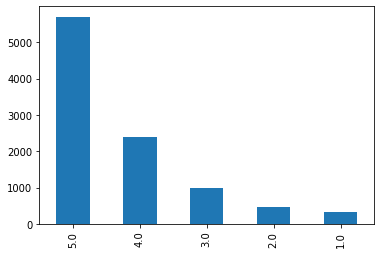

In [33]:
pd.value_counts(df['rating']).plot.bar()

In [17]:
X = tfvec_mat 
y = df['rating']
print(X.shape, y.shape)

(9887, 6092) (9887,)


In [18]:
# Train test split
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7909, 6092) (7909,)
(1978, 6092) (1978,)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV

In [34]:
# logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
cv = cross_val_score(lr, X, y, cv=5)

print('Training score: ', lr.score(X_train, y_train))
print('Testing score: ', lr.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average cv score:', cv.mean())
print('Standard deviation of cv score:', cv.std())

Training score:  0.6471108863320268
Testing score:  0.5819009100101112

Cross-validated scores: [0.58695652 0.58796764 0.58573596 0.60748609 0.57561963]
Average cv score: 0.5887531690272307
Standard deviation of cv score: 0.010357227520543712


In [35]:
# Random forest
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
cv = cross_val_score(rfc, X_train, y_train, cv=5)

print('Training score: ', rfc.score(X_train, y_train))
print('Testing score: ', rfc.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average cv score:', cv.mean())
print('Standard deviation of cv score:', cv.std())

Training score:  0.9911493235554432
Testing score:  0.6678463094034378

Cross-validated scores: [0.66182048 0.65992415 0.66498104 0.65613148 0.6514864 ]
Average cv score: 0.6588687087738321
Standard deviation of cv score: 0.004672865310377553


In [21]:
# K Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
cv = cross_val_score(knn, X, y, cv=5)

print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

print()
print('Cross-validated scores:', cv)
print('Average score:', cv.mean())
print('Standard deviation of score:', cv.std())

0.46112024276141106
0.31193124368048536

Cross-validated scores: [0.32406471 0.49443883 0.47749115 0.31562974 0.34294385]
Average score: 0.3909136566981357
Standard deviation of score: 0.07829517752557197


In [ ]:
# ### Naive Bayes Classifier
# #### Gaussian Naive Bayes

# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB() 
# gnb.fit(X_train, y_train)
# cv = cross_val_score(gnb, X, y, cv=5)

# print(gnb.score(X_train, y_train))
# print(gnb.score(X_test, y_test))

# print()
# print('Cross-validated scores:', cv)
# print('Average score:', cv.mean())
# print('Standard deviation of score:', cv.std())

reference : https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning
* https://www.datacamp.com/cheat-sheet/machine-learning-cheat-sheet